# XGBoost

효율성과 유연성이 뛰어난 모델로  여러 파라미터를 조절해가면서 최적의 model을 만들 수 있다. 또한 오버피팅에도 강하며 신경망에 비해 시각화가 쉽고 이해하기 쉬운 직관적 모델이다.

트리의 구조가 사용된다. 초기 예측값(대부분 0.5설정)을 이용하여 Gain을 가장 극대화하는 방법으로 트리 구조처럼 여러 예측값으로 나눈다. Similarity Score - New, Old 계산된다. Gain 가장 큰 분기로 나누고 리프 노드에 대해 재귀적으로 반복한다. Gain값이 음일 경우 분기를 중지한다.

xgboost 하이퍼파라미터

n_estimators : 결정 트리의 개수
max_depth : 트리의 깊이
colsample_bytree : 컬럼의 샘플링 비율
subsample : weak learner가 학습에 사용하는 데이터 샘플링 비율
learning_rate : 학습률
min_split_loss : 리프 노드를 추가적으로 나눌지 결정하는 값
reg_lambda : L2
reg_alpha : L1

## 암분류 데이터로 xgboost 진행

In [42]:
import warnings 
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from xgboost import XGBClassifier

import pandas as pd

data = datasets.load_breast_cancer()

X = data.data
y = data.target
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 11)

print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


In [43]:
xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

In [44]:
print('정확도 : ',metrics.accuracy_score(y_test,xgb_pred))
print('재현율 : ',metrics.recall_score(y_test,xgb_pred))
print('f1-score : ',metrics.f1_score(y_test,xgb_pred))
print()
print(metrics.classification_report(y_test,xgb_pred))
result = pd.DataFrame(metrics.confusion_matrix(y_test,xgb_pred))
result.index = ['True0','True1']
result.columns = ['Pred0','Pred1']
result

정확도 :  0.9912280701754386
재현율 :  1.0
f1-score :  0.9934640522875817

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      1.00      0.99        76

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



,Pred0,Pred1
True0,37,1
True1,0,76


## xgboost 하이퍼파라미터 튜닝

In [27]:
xgb = XGBClassifier()

xgb_param_grid = {
    'n_estimators' : [100,200,400,600],
    'learning_rate' : [0.01,0.05,0.1,0.15,0.2],
    'max_depth' : [4,6,8,10,12]
}

xgb_grid = GridSearchCV(xgb,param_grid = xgb_param_grid,scoring = 'accuracy',n_jobs=-1,verbose = 1)

In [28]:
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,

In [31]:
print('최고 평균 정확도 : ',xgb_grid.best_score_)
print('최고 파라미터 : ',xgb_grid.best_params_)

최고 평균 정확도 :  0.9714285714285715
최고 파라미터 :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 600}


In [32]:
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by = ['rank_test_score'],inplace = True)

In [34]:
cv_result_df[['params','mean_test_score','rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
97,"{'learning_rate': 0.2, 'max_depth': 12, 'n_est...",0.971429,1
43,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.971429,1
85,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti...",0.971429,1
86,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti...",0.971429,1
93,"{'learning_rate': 0.2, 'max_depth': 10, 'n_est...",0.971429,1
87,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti...",0.971429,1
89,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.971429,1
99,"{'learning_rate': 0.2, 'max_depth': 12, 'n_est...",0.969231,8
90,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.969231,8
91,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.969231,8


## xgboost의 조기종료, 특성 중요도

In [37]:
xgb = XGBClassifier(n_estimators = 600, learning_rate = 0.1, max_depth = 4)
evals = [(X_test,y_test)]
xgb.fit(X_train,y_train,early_stopping_rounds = 3, eval_metric = 'logloss',eval_set = evals,verbose = 1)

[0]	validation_0-logloss:0.61220
Will train until validation_0-logloss hasn't improved in 3 rounds.
[1]	validation_0-logloss:0.53978
[2]	validation_0-logloss:0.48259
[3]	validation_0-logloss:0.43099
[4]	validation_0-logloss:0.38713
[5]	validation_0-logloss:0.34935
[6]	validation_0-logloss:0.31888
[7]	validation_0-logloss:0.28952
[8]	validation_0-logloss:0.26415
[9]	validation_0-logloss:0.24136
[10]	validation_0-logloss:0.22104
[11]	validation_0-logloss:0.20209
[12]	validation_0-logloss:0.18659
[13]	validation_0-logloss:0.17278
[14]	validation_0-logloss:0.16017
[15]	validation_0-logloss:0.14943
[16]	validation_0-logloss:0.14068
[17]	validation_0-logloss:0.13206
[18]	validation_0-logloss:0.12322
[19]	validation_0-logloss:0.11721
[20]	validation_0-logloss:0.11086
[21]	validation_0-logloss:0.10476
[22]	validation_0-logloss:0.10088
[23]	validation_0-logloss:0.09656
[24]	validation_0-logloss:0.09129
[25]	validation_0-logloss:0.08653
[26]	validation_0-logloss:0.08316
[27]	validation_0-logloss

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

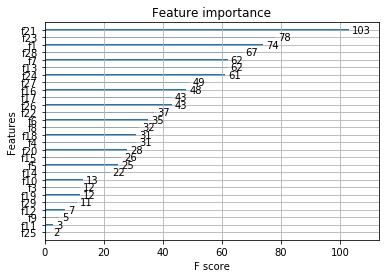

In [45]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plot_importance(xgb,ax=ax)